In [36]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


# Tourism

In [47]:
# Load the datasets
footballers_path = '../results/Footballers/feature_importance.xlsx'
interview_path = '../results/interview/Topics_Correlation.xlsx'
online_path = '../results/online/feature_importances_Tourism.xlsx'

# Read the Excel files
footballers_data = pd.read_excel(footballers_path)
interview_data = pd.read_excel(interview_path)
online_data = pd.read_excel(online_path)

In [48]:
# Standardizing column names for consistency
footballers_data = footballers_data.rename(columns={"name": "Feature", "Importance": "Score"})
interview_data = interview_data.rename(columns={"Topic": "Feature", "Pearson Correlation": "Score"})
online_data = online_data.rename(columns={online_data.columns[0]: "Feature", online_data.columns[1]: "Score"})

In [49]:
interview_data

,Unnamed: 0,Feature,Score,P-value Pearson,Spearman Correlation,P-value Spearman,Correlation Strength
0,0,Promoting gender equality,0.895826,2.766429e-53,0.833719,1.744271e-39,Medium
1,1,Using sports to promote positive messages abou...,0.807665,2.606440e-35,0.706132,1.200302e-23,Medium
2,2,Helping to challenge gender stereotypes and pr...,0.819319,4.286344e-37,0.724713,2.192474e-25,Medium
3,3,Peace,0.971095,9.917465e-93,0.885823,1.533856e-50,high
4,4,Encouraging them to participate in peace initi...,0.978370,8.277393e-102,0.918765,8.458460e-61,high
5,5,Serving as ambassadors of peace by promoting m...,0.966330,5.750307e-88,0.902184,3.536092e-55,high
6,6,event,0.950668,4.195002e-76,0.896267,2.062344e-53,high
7,7,"Significant impact on tourism sectors (e.g., a...",0.943252,8.816523e-72,0.838106,2.933886e-40,high
8,8,about,0.786493,2.315802e-32,0.577689,1.507872e-14,Medium
9,9,Women's Football,0.834697,1.177389e-39,0.756538,1.017438e-28,Medium


In [50]:
# Keeping only necessary columns
footballers_data = footballers_data[["Feature", "Score"]]
interview_data = interview_data[["Feature", "Score"]]
online_data = online_data[["Feature", "Score"]]

In [51]:
# Adding a source column to identify data origin
footballers_data["Source"] = "Footballers"
interview_data["Source"] = "Interview"
online_data["Source"] = "Online"

C:\Users\nouri\AppData\Local\Temp\ipykernel_12012\3959928171.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interview_data["Source"] = "Interview"


In [52]:
# Combine all data into a single dataframe
combined_data = pd.concat([footballers_data, interview_data, online_data], ignore_index=True)

In [53]:
combined_data

,Feature,Score,Source
0,Promoting gender equality,0.030525,Footballers
1,Using sports to promote positive messages abou...,0.025514,Footballers
2,Helping to challenge gender stereotypes and pr...,0.023663,Footballers
3,peace,0.021558,Footballers
4,Encouraging them to participate in peace initi...,0.020016,Footballers
...,...,...,...
166,Suggestions_sports,0.000116,Online
167,Suggestions_the,0.001523,Online
168,Suggestions_tourism,0.000139,Online
169,Suggestions_with,0.000060,Online


In [54]:
# Normalizing the scores to a scale of 0 to 1
scaler = MinMaxScaler()
combined_data["Normalized_Score"] = scaler.fit_transform(combined_data[["Score"]])

In [55]:
combined_data

,Feature,Score,Source,Normalized_Score
0,Promoting gender equality,0.030525,Footballers,0.030575
1,Using sports to promote positive messages abou...,0.025514,Footballers,0.025555
2,Helping to challenge gender stereotypes and pr...,0.023663,Footballers,0.023702
3,peace,0.021558,Footballers,0.021593
4,Encouraging them to participate in peace initi...,0.020016,Footballers,0.020049
...,...,...,...,...
166,Suggestions_sports,0.000116,Online,0.000116
167,Suggestions_the,0.001523,Online,0.001526
168,Suggestions_tourism,0.000139,Online,0.000139
169,Suggestions_with,0.000060,Online,0.000060


In [26]:

# Grouping by feature and calculating the mean normalized score across sources
final_features = (
    combined_data.groupby("Feature")["Normalized_Score"]
    .mean()
    .reset_index()
    .sort_values(by="Normalized_Score", ascending=False)
)

# Display the top 10 most important features
print("Top 10 Features:")
print(final_features.head(10))


Top 10 Features:
                                               Feature  Normalized_Score
4                                    Cultural Exchange          0.986886
109              Peacebuilding and Tourism Development          0.982973
9                                            Education          0.979367
107                                      Peacebuilding          0.974424
48                                               Peace          0.972683
108  Peacebuilding Challenges and Tourism Developme...          0.969894
144                                Women's Empowerment          0.963001
142                                Tourism Development          0.962598
118                                   Sports Diplomacy          0.960117
7     Development of Sports and Tourism Infrastructure          0.959914


In [37]:
# Function to train and evaluate multiple models
def train_and_evaluate_models(data, target_column):
    # Splitting the data into features and target
    X = data.drop(columns=[target_column])
    y = data[target_column]

    # Converting categorical features to numerical using one-hot encoding
    X = pd.get_dummies(X, drop_first=True)

    # Splitting into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Defining models
    models = {
        "Random Forest": RandomForestClassifier(random_state=42),
        "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
        #"XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
        "XGBoost": XGBClassifier(eval_metric='logloss') ,
        "Support Vector Machine (SVM)": SVC(probability=True, random_state=42),
        "K-Nearest Neighbors (KNN)": KNeighborsClassifier(),
        "Decision Tree": DecisionTreeClassifier(random_state=42)
    }

    # Dictionary to store evaluation metrics
    model_scores = {}
    

    # Training and evaluating each model
    for model_name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test)
        
        # Calculate evaluation metrics
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')
        auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]) if hasattr(model, 'predict_proba') else None

        # Save metrics
        model_scores[model_name] = {
            "Accuracy": accuracy,
            "F1 Score": f1,
            "AUC": auc
        }

    # Select the best model based on accuracy
    best_model_name = max(model_scores, key=lambda name: model_scores[name]['Accuracy'])
    best_model = models[best_model_name]

    # Plotting model comparison
    score_df = pd.DataFrame(model_scores).T
    score_df.plot(kind='bar', figsize=(10, 6))
    plt.title("Model Comparison")
    plt.ylabel("Score")
    plt.xticks(rotation=45)
    plt.show()

    # Feature importance for the best model
    if hasattr(best_model, 'feature_importances_'):
        feature_importances = pd.DataFrame({
            'Feature': X.columns,
            'Importance': best_model.feature_importances_
        }).sort_values(by='Importance', ascending=False)

        # Plot feature importance
        plt.figure(figsize=(10, 6))
        sns.barplot(data=feature_importances, x='Importance', y='Feature')
        plt.title(f"Feature Importance ({best_model_name})")
        plt.show()

        print("Top Features:")
        print(feature_importances.head(10))

    # Print best model and its metrics
    print(f"Best Model: {best_model_name}")
    print("Metrics:")
    print(model_scores[best_model_name])

    return best_model


In [38]:
# Preparing the data for Tourism analysis
def prepare_tourism_data(combined_data):
    # Create target column (1 if related to Tourism, 0 otherwise)
    combined_data["Target"] = combined_data["Feature"].str.contains("Tourism", case=False).astype(int)

    # Drop unnecessary columns
    data = combined_data.drop(columns=["Source", "Score", "Normalized_Score"])

    return data


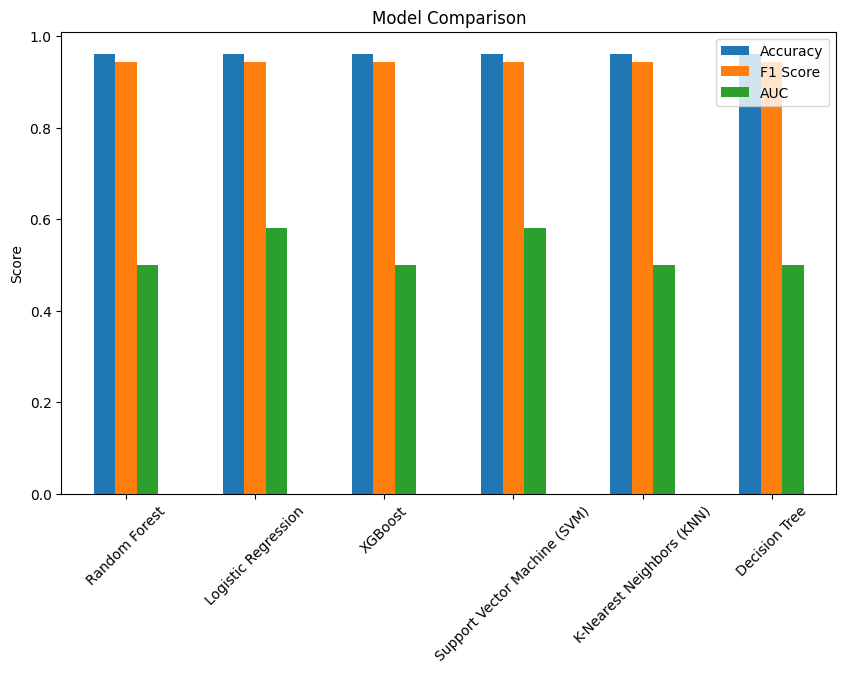

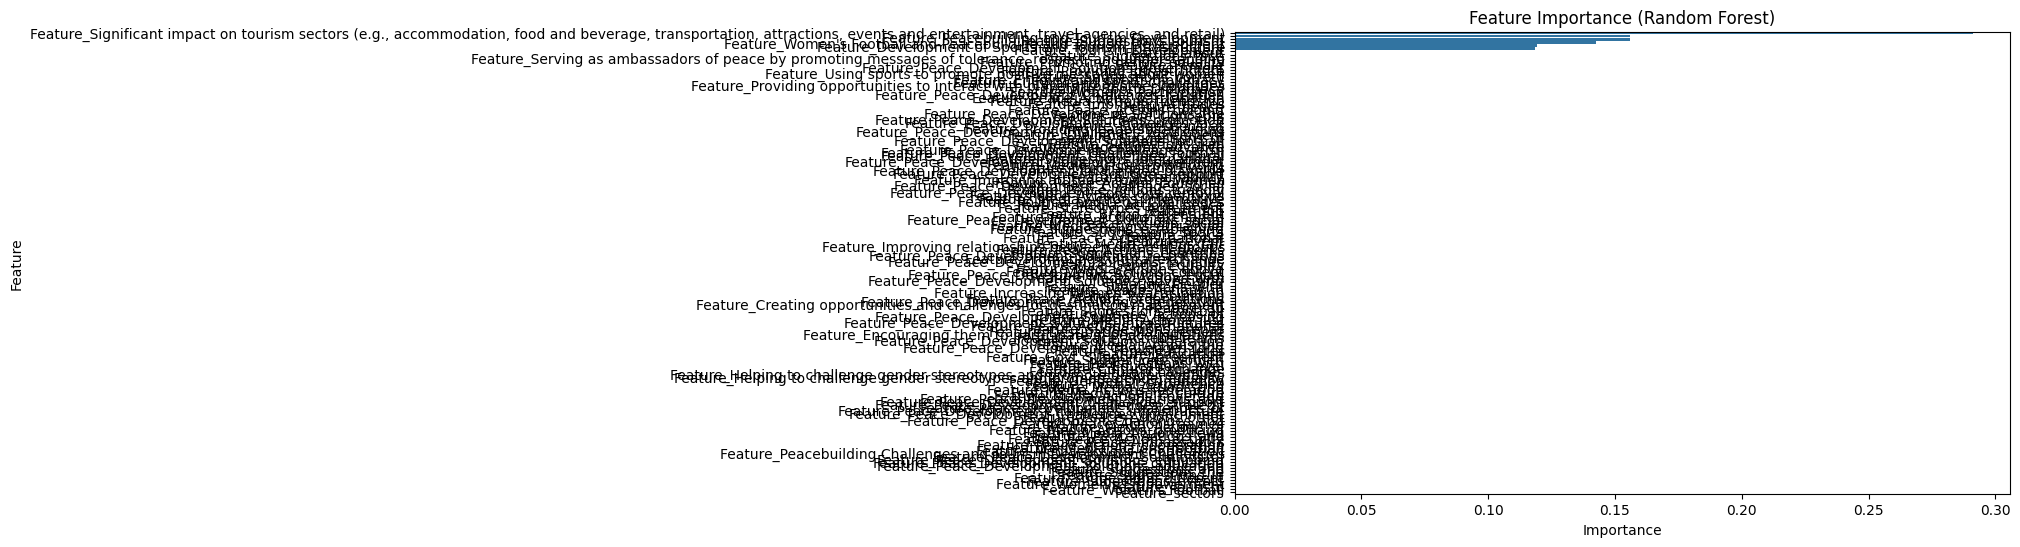

Top Features:
                                               Feature  Importance
116  Feature_Significant impact on tourism sectors ...    0.291044
108      Feature_Peacebuilding and Tourism Development    0.156131
136                        Feature_Suggestions_tourism    0.155924
145  Feature_Women's Football and Peacebuilding and...    0.142717
6    Feature_Development of Sports and Tourism Infr...    0.119245
141                        Feature_Tourism Development    0.118443
147                                      Feature_about    0.000535
128                           Feature_Suggestions_face    0.000486
115  Feature_Serving as ambassadors of peace by pro...    0.000392
111                  Feature_Promoting gender equality    0.000381
Best Model: Random Forest
Metrics:
{'Accuracy': 0.9615384615384616, 'F1 Score': np.float64(0.942684766214178), 'AUC': np.float64(0.5)}


In [39]:

# Load and prepare data
# Assuming combined_data is already loaded and cleaned
data = prepare_tourism_data(combined_data)

# Train models and evaluate
best_model = train_and_evaluate_models(data, "Target")


In [40]:
best_model

RandomForestClassifier(random_state=42)